<a href="https://colab.research.google.com/github/norflin321/ml/blob/main/txt2img_diffusers_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.5 MB/s eta 0:00:00


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

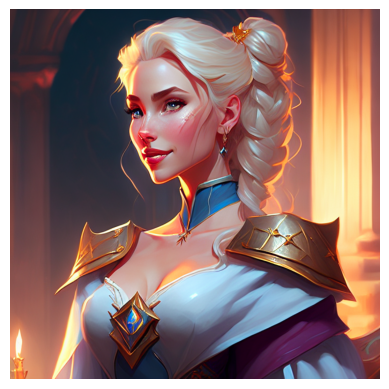

In [1]:
!pip install transformers diffusers accelerate

import torch
from diffusers import StableDiffusionPipeline
from matplotlib import pyplot as plt

model_id = "dreamlike-art/dreamlike-diffusion-1.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "Elsa, d & d, fantasy, intricate, elegant, highly detailed, digital painting, artstation, concept art, matte, sharp focus, illustration, hearthstone, art by artgerm and greg rutkowski and alphonse mucha, 8k"
negative_prompt = "deformed, cripple, ugly, additional arms, additional legs, additional head, two heads, multiple people, group of people"

image = pipe(prompt=prompt, negative_prompt=negative_prompt).images[0]

image.save("./result.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()